In [1]:

import pandas as pd
import numpy as np
import pickle as pkl
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import utils

# Load the interim data set

In [2]:
df = pd.read_csv('../data/interim/seattle_03_28_2022.csv', parse_dates = True)

# Initial exploratory data analysis

In [3]:
df.beds.value_counts()

1    2693
2    1223
0    1132
3     171
4     107
5      32
6       7
8       4
7       2
Name: beds, dtype: int64

Lets start with removing any units that have more than 4 bedrooms as they don't make up much of our data set. Additionally, those units are likely an entire house which is not the purpose of this model. 

In [4]:
# Drop units with more than 4 bedrooms
df = df[df.beds <= 4]

In [5]:
df.describe()

,rent,beds,baths,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,car_charging,roof,concierge,pool,garage,income_restrictions,latitude,longitude,zipcode,dist_seattle,dist_transit,pets_allowed
count,5326.000000,5326.00000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000
mean,2475.524033,1.14157,1.141851,738.298160,0.715546,0.416448,0.784454,0.070034,0.219489,0.512017,0.264739,0.272062,0.606083,0.029478,47.625780,-122.331586,98116.009388,2.818906,0.065208,0.888472
std,1290.206770,0.85528,0.740204,329.373969,0.451196,0.493016,0.411239,0.255228,0.413940,0.499903,0.441236,0.445063,0.488663,0.169158,0.044917,0.025933,14.746175,2.330948,0.044498,0.314815
min,590.000000,0.00000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.416240,-122.412950,98101.000000,0.067143,0.004631,0.000000
25%,1759.000000,1.00000,1.000000,540.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.610160,-122.345260,98105.000000,1.006077,0.034959,1.000000
50%,2195.000000,1.00000,1.000000,673.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,47.619050,-122.333340,98115.000000,1.664686,0.053106,1.000000
75%,2850.000000,2.00000,1.500000,888.750000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,47.657130,-122.315630,98122.000000,4.304351,0.079323,1.000000
max,17585.000000,4.00000,5.000000,4480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.760560,-122.222510,98199.000000,13.124159,0.546244,1.000000


Looking at the rent and sqft columns, it appears there might be some outliers in each of those columns. The first item to review is the rent/sqft and determine if these units really standout or not. 

<AxesSubplot:xlabel='beds', ylabel='rent_per_sqft'>

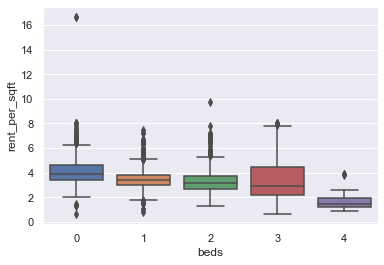

In [389]:
df['rent_per_sqft'] = df.rent/df.sqft
sns.boxplot(x = 'beds', y = 'rent_per_sqft', data = df)

In [390]:
df[df.rent_per_sqft > 8].sort_values('rent_per_sqft', ascending = False)

,property_name,unit_id,rent,beds,baths,sqft,date_available,date_scraped,city,fitness_center,...,garage,income_restrictions,latitude,longitude,neighborhood,zipcode,dist_seattle,dist_transit,pets_allowed,rent_per_sqft
1970,Cubix Northgate,Floor 1 ADA,5000,0,1.0,300,2022-03-28,2022-03-28,Seattle,0,...,0,0,47.70479,-122.34159,North College Park,98133,6.969432,0.013386,1,16.666667
1971,Cubix Northgate,Floor 1 ADA,5000,0,1.0,300,2022-03-28,2022-03-28,Seattle,0,...,0,0,47.70479,-122.34159,North College Park,98133,6.969432,0.013386,1,16.666667
753,2040 Westlake Ave N,2040 Westlake Ave N,1950,2,1.0,200,2022-03-28,2022-03-28,Seattle,0,...,0,0,47.63740,-122.33988,Westlake,98109,2.317237,0.067278,0,9.750000
4415,Solara,Tahoe,4027,0,1.0,499,2022-05-14,2022-03-28,Seattle,1,...,1,0,47.72170,-122.29302,Lake City,98125,8.364567,0.058675,1,8.070140
4420,Solara,Tahoe,4027,0,1.0,499,2022-05-14,2022-03-28,Seattle,1,...,1,0,47.72170,-122.29302,Lake City,98125,8.364567,0.058675,1,8.070140
3973,Onni South Lake Union,3402,11476,3,3.0,1423,2022-08-01,2022-03-28,Seattle,1,...,1,0,47.61928,-122.33511,South Lake Union,98109,1.054851,0.050917,1,8.064652
3974,Onni South Lake Union,3502,11476,3,3.0,1423,2022-08-01,2022-03-28,Seattle,1,...,1,0,47.61928,-122.33511,South Lake Union,98109,1.054851,0.050917,1,8.064652
3972,Onni South Lake Union,3302,11426,3,3.0,1423,2022-08-01,2022-03-28,Seattle,1,...,1,0,47.61928,-122.33511,South Lake Union,98109,1.054851,0.050917,1,8.029515
4351,Odessa Apartments,B3,1097,0,0.0,137,2022-04-01,2022-03-28,Seattle,0,...,1,0,47.64983,-122.32183,Portage Bay,98102,3.225994,0.019505,1,8.007299


The three bedroom apartments and very small studio (137 square feet) don't appear to have an issues as those are reasonable, in my opinion.

There definitely appears to be some issues with the rest of these units. 
* A tiny studio should not be priced that high - either the value is incorrect or the property is not aware that this is an unrealstic price. 
* A two bedroom apartment that is only 200 sqft also doesn't seem right. Even the smallest studios are generally larger than that. 

Given that our dataset already has nearly 5,400 apartments, I think its safe to remove these units for now. We may come back an impute these values if it seems necessary.

In [391]:
df = df[df.rent_per_sqft < 8.07]

In [392]:
# Descriptive stats based on setting a specific target column
def descriptive_stats(target,df):
    average = df.groupby('beds', as_index=True)[target].mean()
    ci_5 = df.groupby('beds', as_index=True)[target].quantile(0.05)    #5th Percentile
    ci_95 = df.groupby('beds', as_index=True)[target].quantile(0.95)   #95th Percentile
    minimum= df.groupby('beds', as_index=True)[target].min()
    maximum = df.groupby('beds', as_index=True)[target].max()
    std = df.groupby('beds', as_index=True)[target].std()
    
    stats_df = pd.DataFrame({f'Average {target}':average, 
                            '5th Percentile':ci_5,
                            '95th Percentile':ci_95,
                            'Minimum':minimum, 
                            'Maximum':maximum,
                            'Standard Deviation':std})
    
    stats_df.reset_index(inplace=True)
    return stats_df

In [393]:
descriptive_stats('rent_per_sqft',df)

,beds,Average rent_per_sqft,5th Percentile,95th Percentile,Minimum,Maximum,Standard Deviation
0,0,4.038680,2.727051,5.890541,0.608696,8.007299,0.986821
1,1,3.443098,2.198193,4.792683,0.825000,7.500000,0.758472
2,2,3.247991,1.878171,4.625401,1.272802,7.812418,0.930115
3,3,3.529139,1.515769,7.468038,0.675676,8.064652,1.864641
4,4,1.628607,0.987477,2.392354,0.880197,3.888000,0.569491


In [394]:
descriptive_stats('rent',df)

,beds,Average rent,5th Percentile,95th Percentile,Minimum,Maximum,Standard Deviation
0,0,1666.094858,1050.0,2315.30,645,4400,431.182731
1,1,2262.660230,1400.0,3260.00,590,5475,568.688067
2,2,3308.213584,1645.0,5409.25,995,17585,1485.665352
3,3,5169.596491,1736.0,11476.00,1000,17425,3354.605638
4,4,2479.439252,1299.0,5132.50,1215,6795,1402.978605


In [395]:
descriptive_stats('sqft',df)

,beds,Average sqft,5th Percentile,95th Percentile,Minimum,Maximum,Standard Deviation
0,0,439.008865,200.0,618.00,115,3450,176.353012
1,1,667.721129,487.2,903.40,100,2000,141.341397
2,2,1006.228314,677.0,1419.15,337,2443,230.891229
3,3,1448.315789,877.0,2249.50,609,3710,439.742618
4,4,1492.803738,895.0,2517.00,862,4480,620.526168


After removing a few initial outliers, it looks like several more may remain in the dataset. The most obvious values to investigate further are mainly related to the studio apartments and some of the very highly priced 2 bedroom apartments.

In [396]:
# Detecting possible outliers with standard deviation and IQR 
def outlier_detection(target,df_input):
    
    # Adjust the distributions since they are not normal
    if target == 'rent':
        df_input.rent = np.log(df_input.rent)
    elif target == 'sqft':
        df_input.sqft = np.log(df_input.sqft)
    
    # Boundary zones
    average = df_input.groupby('beds', as_index=True)[target].mean()
    std = df_input.groupby('beds', as_index=True)[target].std()
    upper_limit = average + 3*std
    lower_limit = average - 3*std
    
    # Quartile Range
    iqr_25 = df_input.groupby('beds', as_index=True)[target].quantile(0.25)    
    iqr_75 = df_input.groupby('beds', as_index=True)[target].quantile(0.75)   
    iqr = iqr_75 - iqr_25
    iqr_upper = iqr_75 + iqr
    iqr_lower = iqr_25 - iqr
    
    # Set the conditions for upper limit
    cond1 = df_input[target] > df_input.beds.map(upper_limit)
    cond2 = df_input[target] > df_input.beds.map(iqr_upper)
    
    # Set the conditions for lower limit
    cond3 = df_input[target] < df_input.beds.map(lower_limit)
    cond4 = df_input[target] < df_input.beds.map(iqr_lower)

    outlier_df = df_input[(cond1 & cond2)]
    
    # Take the exponential to revert back to the original data condition
    if target == 'rent':
        outlier_df[target] = np.exp(outlier_df[target])
    elif target == 'sqft':
        outlier_df[target] = np.exp(outlier_df[target])
        
    # Filter out any income restriction units
    outlier_df = outlier_df[outlier_df.income_restrictions != 1]
    
    #stats_df.reset_index(inplace=True)
    return outlier_df

In [397]:
outliers = pd.concat([outlier_detection('rent', df.copy()),outlier_detection('sqft', df.copy())]).drop_duplicates()
outliers.head()

/var/folders/1v/2xtr296s1rz_4kd_c4kx7qh00000gn/T/ipykernel_80427/2262256870.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df[target] = np.exp(outlier_df[target])
/var/folders/1v/2xtr296s1rz_4kd_c4kx7qh00000gn/T/ipykernel_80427/2262256870.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df[target] = np.exp(outlier_df[target])


,property_name,unit_id,rent,beds,baths,sqft,date_available,date_scraped,city,fitness_center,...,garage,income_restrictions,latitude,longitude,neighborhood,zipcode,dist_seattle,dist_transit,pets_allowed,rent_per_sqft
104,Orion,Studio,3503.0,0,1.0,500.0,2022-03-28,2022-03-28,Seattle,1,...,1,0,47.62004,-122.33931,South Lake Union,98109,1.124048,0.098785,1,7.006000
554,REN,508,11953.0,2,2.0,1530.0,2022-04-05,2022-03-28,Seattle,1,...,0,0,47.61833,-122.33394,Denny Triangle,98121,0.990859,0.022736,1,7.812418
1357,The Goodwin,701,4800.0,1,1.0,1282.0,2022-03-28,2022-03-28,Seattle,0,...,0,0,47.61302,-122.34662,Belltown,98121,0.819704,0.079323,1,3.744150
1516,The Ivey on Boren,4202,12460.0,2,2.0,1954.0,2022-07-15,2022-03-28,Seattle,1,...,0,0,47.61797,-122.33506,Denny Triangle,98121,0.964348,0.040869,0,6.376663
1517,The Ivey on Boren,4302,12475.0,2,2.0,1954.0,2022-07-15,2022-03-28,Seattle,1,...,0,0,47.61797,-122.33506,Denny Triangle,98121,0.964348,0.040869,0,6.384340


In [398]:
df = df[~df.index.isin(outliers.index)]

# Exploration of the location data (zipcodes and neighborhoods)

### Explore clustering the zipcodes or neighborhoods based on lat/long

In [399]:
df.neighborhood.value_counts()

South Lake Union       608
Denny Triangle         392
Capitol Hill           343
Belltown               341
University District    331
                      ... 
Seatac                   1
Allentown                1
Georgetown               1
Briarcliff               1
University Heights       1
Name: neighborhood, Length: 94, dtype: int64

In [400]:
df.zipcode.value_counts().head()

98109    821
98121    643
98122    556
98105    483
98101    373
Name: zipcode, dtype: int64

Both features seem to be too granular - especially for relabling/encoding purposes. Clustering the zipcodes based on the centroids of each using latitude and longitude. This should provide more control to group similar zipcodes and account for the varying size of each zipcode. 
* Since most zipcodes vary in size and density of apartments, providing a clustering weight should help find the most ideal clusters. Starting with the number of apartment listings occur in each zipcode should be a good basis to work from. We'll also include a rent/sqft weight as an alternative method to weighting.

In [401]:
# Load a dictionary of all the us zipcodes and their lat/long
all_us_zipcodes = pd.read_csv('../data/external/US_ZipCode_Locations.txt', dtype=str).set_index('ZIP').to_dict()

# Change the main df zipcode column to a string format 
df = df.astype({"zipcode": str})


# Create the dataframe to perform clustering on
seattle_zipcodes = pd.DataFrame(df.zipcode.unique()).rename(columns = {0: 'zipcode'}).astype(str)
seattle_zipcodes['latitude'] = seattle_zipcodes['zipcode'].map(all_us_zipcodes['LAT'])
seattle_zipcodes['longitude'] = seattle_zipcodes['zipcode'].map(all_us_zipcodes['LNG'])
seattle_zipcodes['num_apartments'] = seattle_zipcodes['zipcode'].map(
    df.groupby('zipcode')['rent'].count().to_dict()
)
seattle_zipcodes['avg_rent_per_sqft'] = seattle_zipcodes['zipcode'].map(
    df.groupby('zipcode')['rent_per_sqft'].mean().to_dict()
)

seattle_zipcodes.head()

,zipcode,latitude,longitude,num_apartments,avg_rent_per_sqft
0,98115,47.685746,-122.281589,135,3.517057
1,98119,47.638679,-122.370946,150,3.144017
2,98125,47.716513,-122.295829,180,2.785391
3,98199,47.651371,-122.407349,32,2.479811
4,98102,47.637140,-122.321891,153,3.785112


In [402]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

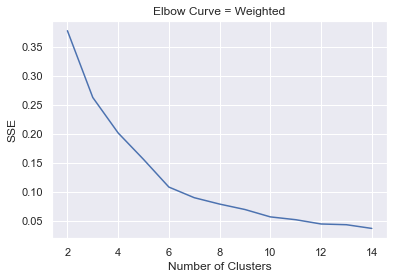

In [403]:
# Find the optimal number of clusters to use
K_clusters = range(2,15)
lat_long = seattle_zipcodes.iloc[:,1:3]
kmeans_weights = seattle_zipcodes.loc[:,'avg_rent_per_sqft']     # Chose to use the avg rent/sqft after studying both weight options

# Set the parameters for KMeans
kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 1000,
                 "random_state": 42}

sse =[]

for k in K_clusters:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(lat_long, sample_weight = kmeans_weights)
    sse.append(kmeans.inertia_)


plt.plot(K_clusters, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve = Weighted')
plt.show()

Around 7 clusters is when it appears that the curve becomes linear - we'll proceed with 7 clusters. It might be a coincidence but the City of Seattle is broken into 7 Council Districts for elections. 

In [404]:
kmeans = KMeans(n_clusters=7, **kmeans_kwargs)
kmeans.fit(lat_long, sample_weight = kmeans_weights)

seattle_zipcodes['cluster_id'] = kmeans.predict(lat_long, sample_weight = kmeans_weights)
seattle_zipcodes.latitude = seattle_zipcodes.latitude.astype(float)
seattle_zipcodes.longitude = seattle_zipcodes.longitude.astype(float)

In [405]:
seattle_zipcodes.head()

,zipcode,latitude,longitude,num_apartments,avg_rent_per_sqft,cluster_id
0,98115,47.685746,-122.281589,135,3.517057,2
1,98119,47.638679,-122.370946,150,3.144017,1
2,98125,47.716513,-122.295829,180,2.785391,6
3,98199,47.651371,-122.407349,32,2.479811,1
4,98102,47.637140,-122.321891,153,3.785112,3


In [406]:
# Convert the cluster ids to dictionary and map to main dataframe
seattle_zipcodes.set_index('zipcode', inplace=True)
zipcode_clusters = seattle_zipcodes['cluster_id'].to_dict()
df['zipcode_cluster'] = df.zipcode.map(zipcode_clusters)
df.head()

,property_name,unit_id,rent,beds,baths,sqft,date_available,date_scraped,city,fitness_center,...,income_restrictions,latitude,longitude,neighborhood,zipcode,dist_seattle,dist_transit,pets_allowed,rent_per_sqft,zipcode_cluster
0,Rooster Apartments,301,1820,1,1.0,510,2022-03-28,2022-03-28,Seattle,1,...,0,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.568627,2
1,Rooster Apartments,604,1835,1,1.0,510,2022-03-28,2022-03-28,Seattle,1,...,0,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.598039,2
2,Rooster Apartments,302,1820,1,1.0,510,2022-04-03,2022-03-28,Seattle,1,...,0,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.568627,2
3,Rooster Apartments,520,1825,1,1.0,567,2022-03-28,2022-03-28,Seattle,1,...,0,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.218695,2
4,Rooster Apartments,231,2581,1,1.0,974,2022-03-28,2022-03-28,Seattle,1,...,0,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,2.649897,2


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

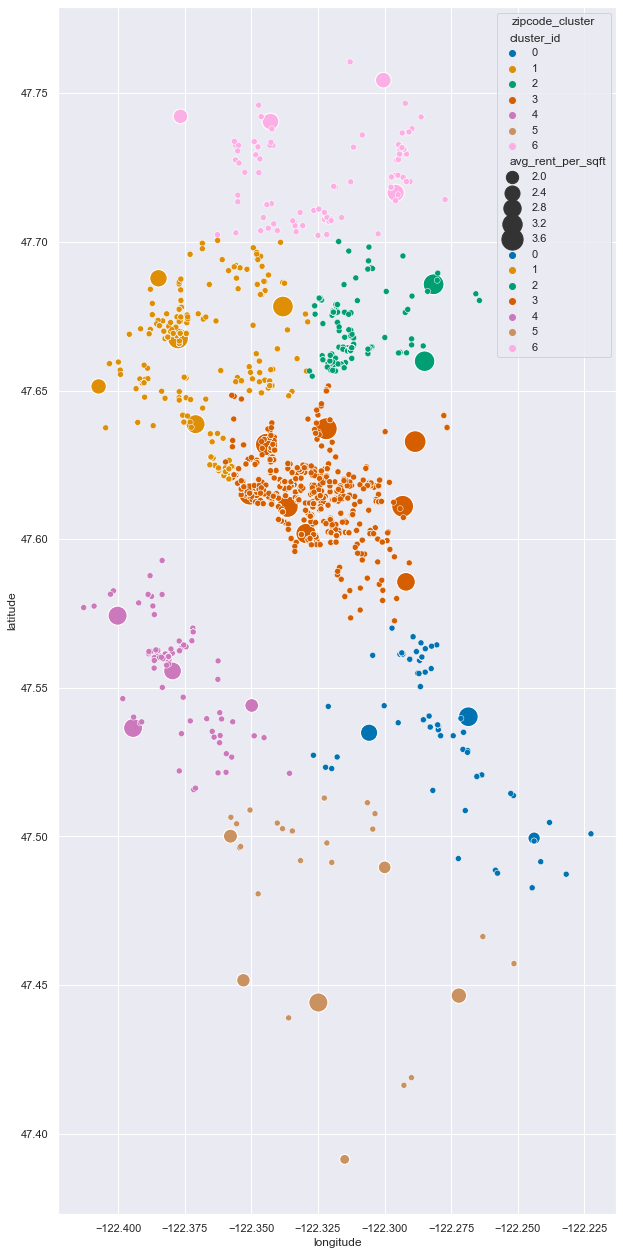

In [407]:
# Plot the centroid of each zipcode and visualize the clusters
fig = plt.gcf()
scaler = abs((seattle_zipcodes.latitude.max()-seattle_zipcodes.latitude.min())/(seattle_zipcodes.longitude.max()-seattle_zipcodes.longitude.min()))
fig.set_size_inches(10, 10*scaler)

sns.scatterplot(data=seattle_zipcodes, x='longitude', y='latitude', hue='cluster_id', size='avg_rent_per_sqft', sizes=(100, 500), palette='colorblind')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='zipcode_cluster', palette='colorblind')

In [318]:
# Save the kmeans clustering model
# Uncomment to save again
# pkl.dump(zipcode_clusters, open("../models/seattle_zipcode_clusters.p", "wb"))

### Add commute times to the centroid of each zipcode

In [319]:
# Get commute distance
# downtown_seattle = {"lat": 47.604013, "lon": -122.335167}
# seattle_zipcodes['commute_time_transit'] = seattle_zipcodes.apply(lambda row: utils.google_distance_matrix(row.latitude, row.longitude, downtown_seattle['lat'], downtown_seattle['lon'], mode = 'transit'), axis =1)

In [320]:
#seattle_zipcodes.to_csv("../data/processed/seattle_zipcode.csv")
seattle_zipcodes = pd.read_csv("../data/processed/seattle_zipcode.csv")
seattle_zipcodes.zipcode = seattle_zipcodes.zipcode.astype(str)

In [321]:
# Map commute times by zipcode to the entire dataframe of units
# Adjust the commute time to the specific lat/long of the property

def add_commute_time():
    # downtown seattle zipcode
    seattle = {"lat": 47.604013, "lon": -122.335167}
    
    # Get distance to centroid of each zipcode and calculat the 
    seattle_zipcodes['commute_time_per_distance'] = seattle_zipcodes.apply(lambda row: 
        row.commute_time_transit / 
        utils.calculate_distance(float(row.latitude), float(row.longitude), seattle['lat'], seattle['lon']), axis=1)
    seattle_zipcodes.set_index('zipcode', inplace=True)
    
    # map the zipcode commute times
    df['commute_time_transit'] = df.zipcode.map(seattle_zipcodes.to_dict()['commute_time_per_distance']) * df.dist_seattle
    
add_commute_time()
df.head()

,property_name,unit_id,rent,beds,baths,sqft,date_available,date_scraped,city,fitness_center,...,latitude,longitude,neighborhood,zipcode,dist_seattle,dist_transit,pets_allowed,rent_per_sqft,zipcode_cluster,commute_time_transit
0,Rooster Apartments,301,1820,1,1.0,510,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.568627,2,38.435493
1,Rooster Apartments,604,1835,1,1.0,510,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.598039,2,38.435493
2,Rooster Apartments,302,1820,1,1.0,510,2022-04-03,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.568627,2,38.435493
3,Rooster Apartments,520,1825,1,1.0,567,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.218695,2,38.435493
4,Rooster Apartments,231,2581,1,1.0,974,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,2.649897,2,38.435493


# Visualizations

<AxesSubplot:>

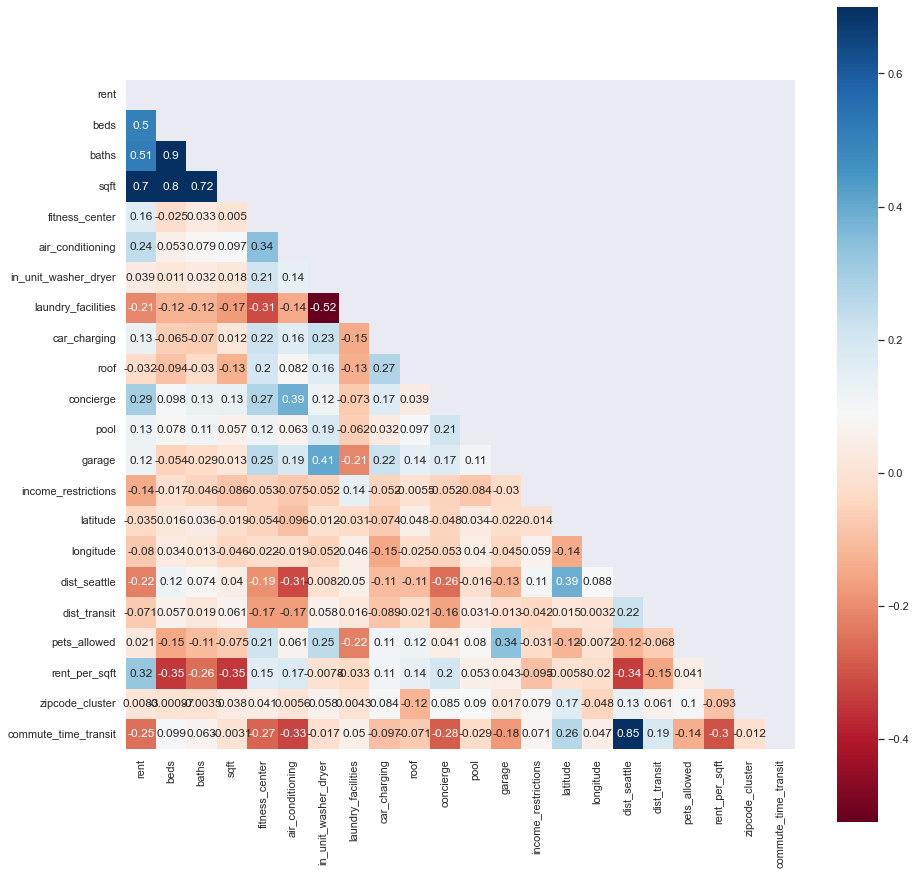

In [322]:
corr_map = df.corr()

# Create a mask
mask = np.triu(np.ones_like(corr_map, dtype=bool))

f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_map, square = True, vmax = 0.7, cmap = 'RdBu', annot = True, mask = mask)

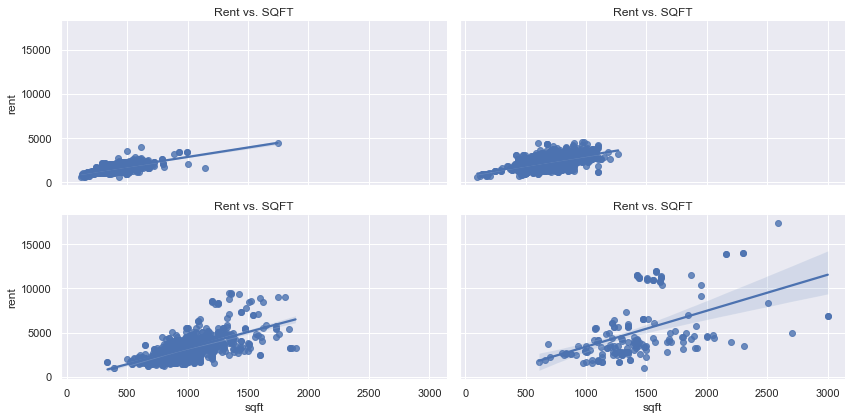

In [323]:
g = sns.FacetGrid(df[df.beds<4], col='beds', col_wrap = 2, aspect = 2)
g.map(sns.regplot,'sqft','rent').set(title='Rent vs. SQFT')

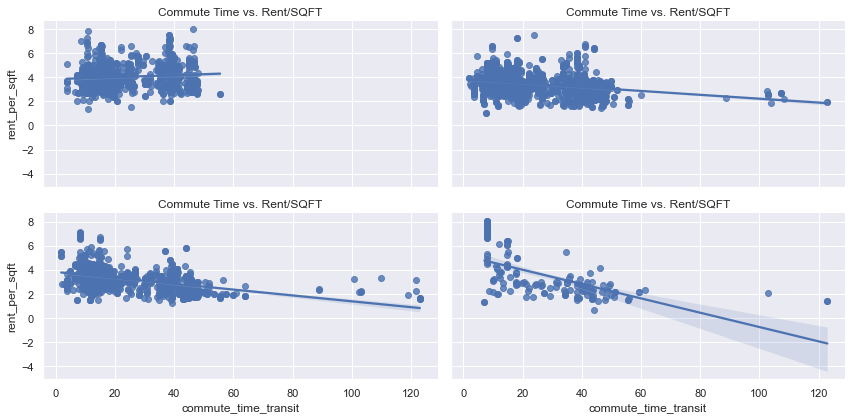

In [324]:
g = sns.FacetGrid(df[df.beds<4], col='beds', col_wrap = 2, aspect = 2)
g.map(sns.regplot,'commute_time_transit','rent_per_sqft').set(title='Commute Time vs. Rent/SQFT')

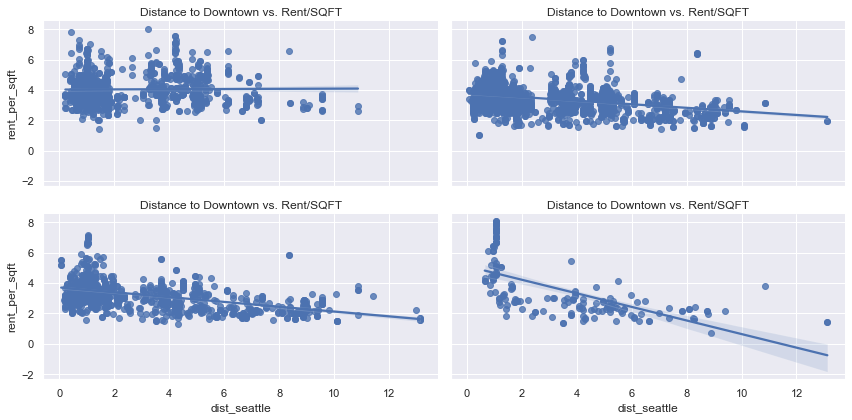

In [325]:
g = sns.FacetGrid(df[df.beds<4], col='beds', col_wrap = 2, aspect = 2)
g.map(sns.regplot,'dist_seattle','rent_per_sqft').set(title='Distance to Downtown vs. Rent/SQFT')

Neither option - distance to downtown or commute time - appears to have a more significant impact on the rent/sqft. We'll begin the model with distance to downtwon, however, it might be worth investigating the use of commute time instead.

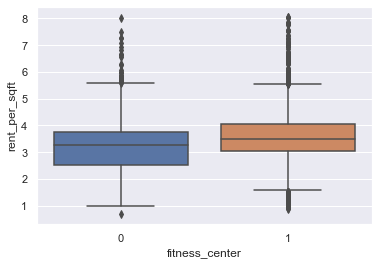

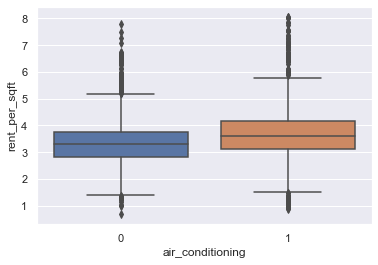

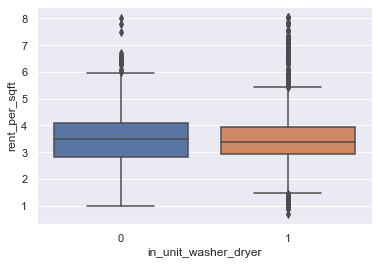

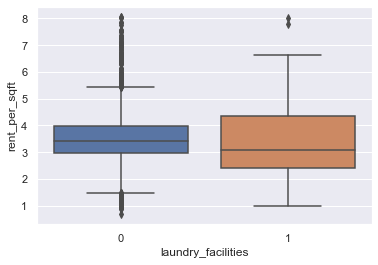

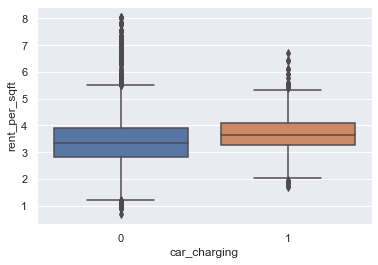

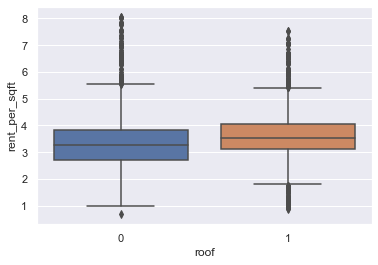

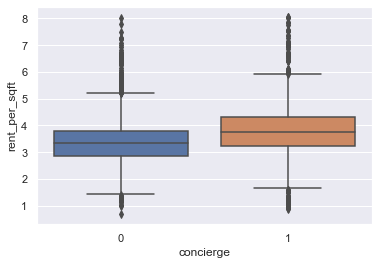

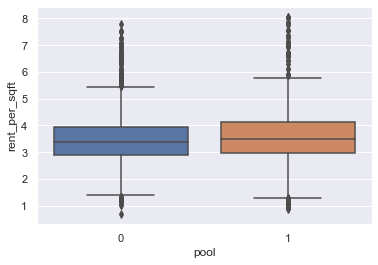

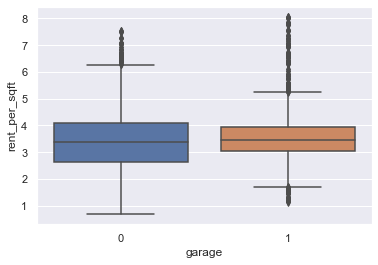

In [326]:
#plotting binary features
for i in df.columns[9:18]:
  plt.figure()
  sns.boxplot(x = i, y = 'rent_per_sqft', data = df)
  plt.show()
  plt.close()

Most of these categorial features result in expected behavior. It's interesting that having a washer and dryer in unit lowers the price per square foot. This may be due to grouping all units across Seattle into one group. For now we will leave this in and re-evaluate after building a base model. 

# Preparing data for modeling

In [327]:
df.head()

,property_name,unit_id,rent,beds,baths,sqft,date_available,date_scraped,city,fitness_center,...,latitude,longitude,neighborhood,zipcode,dist_seattle,dist_transit,pets_allowed,rent_per_sqft,zipcode_cluster,commute_time_transit
0,Rooster Apartments,301,1820,1,1.0,510,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.568627,2,38.435493
1,Rooster Apartments,604,1835,1,1.0,510,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.598039,2,38.435493
2,Rooster Apartments,302,1820,1,1.0,510,2022-04-03,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.568627,2,38.435493
3,Rooster Apartments,520,1825,1,1.0,567,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,3.218695,2,38.435493
4,Rooster Apartments,231,2581,1,1.0,974,2022-03-28,2022-03-28,Seattle,1,...,47.67617,-122.3181,Seattle,98115,5.048482,0.029716,1,2.649897,2,38.435493


In [328]:
# Drop unnecessary columns 
drop_columns = ['latitude', 'longitude', 'commute_time_transit', 'property_name', 
                'neighborhood', 'zipcode', 'date_available',
                'date_scraped', 'city', 'unit_id', 'rent_per_sqft']

df_model = df.drop(columns=drop_columns)
df_model.head()

,rent,beds,baths,sqft,fitness_center,air_conditioning,in_unit_washer_dryer,laundry_facilities,car_charging,roof,concierge,pool,garage,income_restrictions,dist_seattle,dist_transit,pets_allowed,zipcode_cluster
0,1820,1,1.0,510,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
1,1835,1,1.0,510,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
2,1820,1,1.0,510,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
3,1825,1,1.0,567,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2
4,2581,1,1.0,974,1,0,1,0,0,1,0,0,1,0,5.048482,0.029716,1,2


## Check the distributions of Rent and SQFT to ensure that they are normal

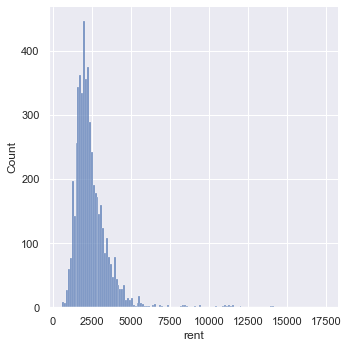

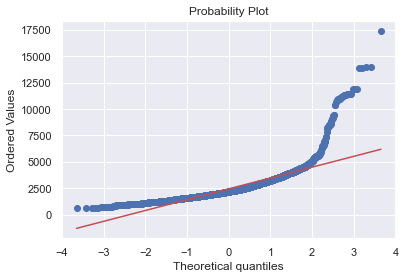

In [329]:
from scipy import stats
#Distribution of the rent column
sns.displot(df_model.rent)
fig = plt.figure()
res = stats.probplot(df_model.rent, plot=plt)

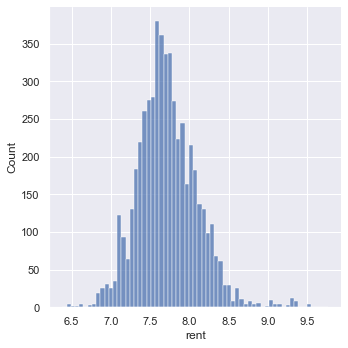

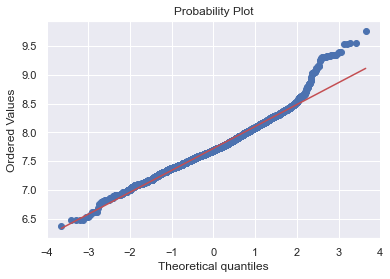

In [330]:
#Distribution of the rent column
sns.displot(np.log(df_model.rent))
fig = plt.figure()
res = stats.probplot(np.log(df_model.rent), plot=plt)

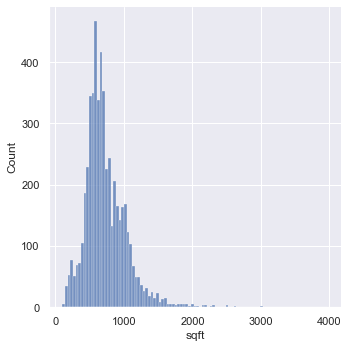

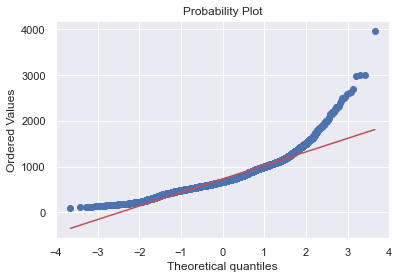

In [331]:
#Distribution of the rent column
sns.displot(df_model.sqft)
fig = plt.figure()
res = stats.probplot(df_model.sqft, plot=plt)

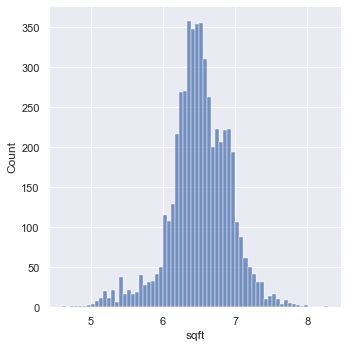

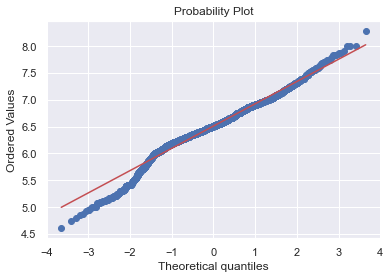

In [332]:
#Distribution of the rent column
sns.displot(np.log(df_model.sqft))
fig = plt.figure()
res = stats.probplot(np.log(df_model.sqft), plot=plt)

In [333]:
# Take the log of each column for the final model dataset
df_model.rent = np.log(df_model.rent)
df_model.sqft = np.log(df_model.sqft)

In [334]:
df_model.to_csv('../data/processed/seattle_ready_03_28_2022.csv', index=False)